# House price prediction

In [1]:
import pandas as pd
df = pd.read_csv('house_price.csv')
df.head(10)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,6,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,7,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,8,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041
8,9,"Postjeskade 41 2, Amsterdam",1058 DG,399000.0,49,3,4.854671,52.363471
9,10,"Van Ostadestraat 193 H, Amsterdam",1073 TM,300000.0,33,2,4.897142,52.353111


In [2]:
df.shape

(924, 8)

In [3]:
#to check is there any null value or not
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

<AxesSubplot:>

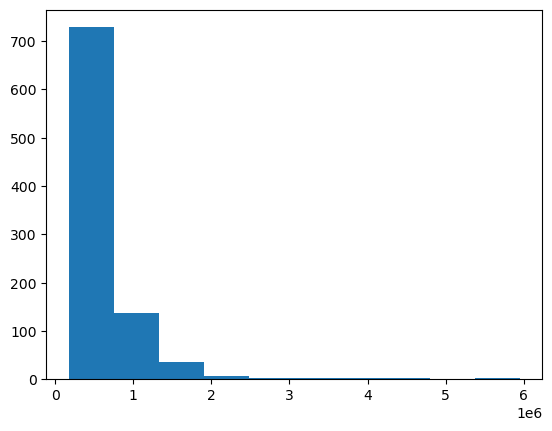

In [5]:
# to check skewness of the data
df['Price'].hist(grid=False)

In [6]:
df['Price'].skew()

4.828817373245922

C:\Users\pousalo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

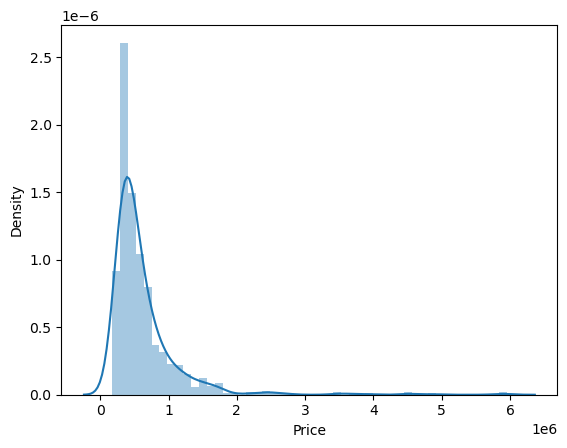

In [7]:
import seaborn as sns
sns.distplot(df['Price'],hist =True)

In [8]:
import numpy as np
log_nor=np.log(df['Price'])
log_nor

0      13.437174
1      13.071070
2      13.652992
3      13.270783
4      13.487006
         ...    
919    13.527828
920    12.765688
921    12.765688
922    13.303017
923    12.611538
Name: Price, Length: 924, dtype: float64

In [9]:
log_nor.skew()

1.077502598289587

In [10]:
reci=np.reciprocal(df['Price'])
reci.skew()

0.0

In [11]:
df['Price'].fillna(df['Price'].median(),inplace=True)

In [12]:
df.isnull().sum()

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [13]:
#for practice only how to use label_encoder
#from sklearn.preprocessing import LabelEncoder

In [14]:
#le_Address=LabelEncoder()
#new_df["Num_address"]=le_Address.fit_transform(new_df['Address'])

In [15]:
new_d1=df.drop(['Address'],axis='columns')
new_d1

,Zip,Price,Area,Room,Lon,Lat
0,1091 CR,685000.0,64,3,4.907736,52.356157
1,1059 EL,475000.0,60,3,4.850476,52.348586
2,1097 SM,850000.0,109,4,4.944774,52.343782
3,1060 TH,580000.0,128,6,4.789928,52.343712
4,1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...
919,1097 AE,750000.0,117,1,4.927757,52.354173
920,1033 CP,350000.0,72,3,4.890612,52.414587
921,1058 AK,350000.0,51,3,4.856935,52.363256
922,1095 MB,599000.0,113,4,4.965731,52.375268


In [16]:
new_d2=new_d1.drop(['Zip'],axis='columns')
new_d2

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


In [17]:
new_d3=new_d2.drop(['Lon'],axis='columns')
new_d3

,Price,Area,Room,Lat
0,685000.0,64,3,52.356157
1,475000.0,60,3,52.348586
2,850000.0,109,4,52.343782
3,580000.0,128,6,52.343712
4,720000.0,138,5,52.410538
...,...,...,...,...
919,750000.0,117,1,52.354173
920,350000.0,72,3,52.414587
921,350000.0,51,3,52.363256
922,599000.0,113,4,52.375268


In [18]:
dataframe=new_d3.drop(['Lat'],axis='columns')
dataframe

,Price,Area,Room
0,685000.0,64,3
1,475000.0,60,3
2,850000.0,109,4
3,580000.0,128,6
4,720000.0,138,5
...,...,...,...
919,750000.0,117,1
920,350000.0,72,3
921,350000.0,51,3
922,599000.0,113,4


In [19]:
#new_df=df.drop('Num_address',axis='columns')

In [20]:
x = dataframe[['Area','Room']]
y = dataframe[['Price']]

In [21]:
x

,Area,Room
0,64,3
1,60,3
2,109,4
3,128,6
4,138,5
...,...,...
919,117,1
920,72,3
921,51,3
922,113,4


In [22]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [24]:
reg.fit(x,y)

LinearRegression()

In [25]:
reg.predict([[567,4]])

C:\Users\pousalo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4817312.45633743]])

In [26]:
reg.score(x,y)

0.6861395054899619